In [563]:
%pip install timm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [574]:
import os
from argparse import Namespace
import json

import pandas as pd
import matplotlib.pyplot as plt
from torch.nn import functional as fnn

from train import main

In [575]:
#!g1.1
request = Namespace(
    name=f'efficientnetv2_rw_s_l1_loss_ADAM_64000_50_lr0.001',
    data_folder='data',
    data_size=64_000,
    crop_size=288, # efficientnet_b3, efficientnetv2_rw_s use only 288!
    batch_size=64,
    epochs=50,
    learning_rate=0.001,
    gpu=True,
    worker=1
)
main(request)

prediction...: 100%|██████████| 250/250 [02:05<00:00,  1.99it/s]


Create submission...


(8.0, 10.0)

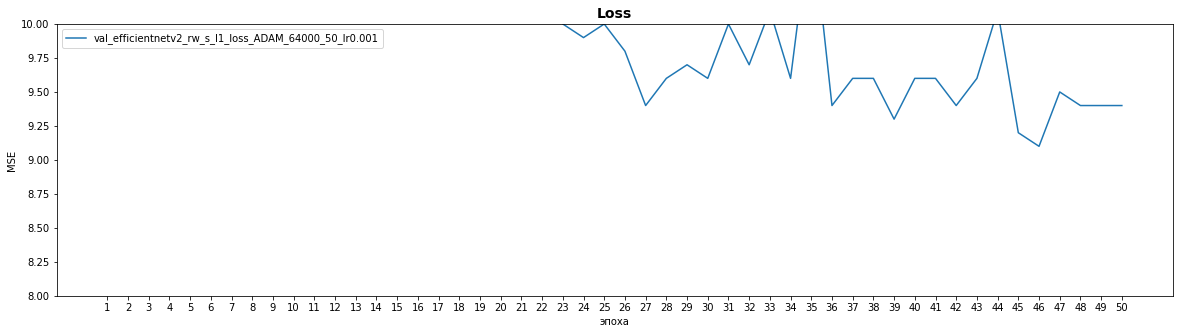

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:828: UserWarning: The following variables cannot be serialized: f
  warnings.warn(message)


In [578]:
# figure
plt.figure(figsize=(20, 5)) 
ax = plt.axes() # Add an axes to the current figure and make it the current axes

for experiment in [
    'efficientnetv2_rw_s_l1_loss_ADAM_64000_50_lr0.001' 
]:
    

    with open(f'runs/{experiment}/metrics_{experiment}.txt') as f:
        metrics = json.load(f)

    # data
    x = range(1, len(metrics['val_loss']) + 1)
    ls = 'solid' if experiment=='efficientnetv2_rw_s_l1_loss_ADAM_64000_50_lr0.001' else 'dotted'
    ax.plot(x, metrics['val_loss'], linestyle=ls, label=f'val_{experiment}')

# annotation    
ax.set_title('Loss', fontsize=14, fontweight='bold')
ax.set_xlabel('эпоха')
ax.set_ylabel('MSE')
ax.legend()
ax.set_xticks(range(1, len(metrics['train_loss']) + 1))
ax.set_ylim([8, 10])

In [542]:
# # создание модели
# import timm

# model = timm.create_model('efficientnet_b3', pretrained=True)
# model.eval()

In [479]:
# загрузка изображения
import urllib
from PIL import Image

url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)
img = Image.open(filename).convert('RGB')

In [510]:
# Что подается на вход трансформациям?
print(type(img))

<class 'PIL.Image.Image'>


In [543]:
# создание трансформации
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)

In [497]:
# применение трансформации
tensor = transform(img)

In [ ]:
# что на выходе timm трансформаций

In [496]:
print(tensor.shape, type(tensor))

torch.Size([3, 288, 288]) <class 'torch.Tensor'>


In [544]:
transform

Compose(
    Resize(size=288, interpolation=PIL.Image.BICUBIC)
    CenterCrop(size=(288, 288))
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [517]:
transform

Compose(
    Resize(size=288, interpolation=PIL.Image.BICUBIC)
    CenterCrop(size=(288, 288))
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [ ]:
# текущие трансофрмации

In [511]:
from torchvision import transforms
from utils import ScaleMinSideToSize, CropCenter, TransformByKeys

train_transforms = transforms.Compose([
        ScaleMinSideToSize((288, 288)),
        CropCenter(288),
        TransformByKeys(transforms.ToPILImage(), ("image",)),
#         TransformByKeys(transforms.ToTensor(), ("image",)),
#         TransformByKeys(transforms.Normalize(mean=[0.485, 0.0456, 0.406], std=[0.229, 0.224, 0.225]), ("image",)),
    ]) 

In [512]:
import cv2

example_file = 'data/test/images/006bc4142dcf703224dd709aec392f56.jpg'
image = cv2.imread(example_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_transformed = train_transforms({'image':image})

In [508]:
print(type(image_transformed['image']))

<class 'PIL.Image.Image'>


In [516]:
transform(image_transformed['image'])

tensor([[[-2.1008, -2.1008, -1.9980,  ..., -1.6213, -1.6213, -1.6213],
         [-2.0837, -2.0837, -1.9980,  ..., -1.6213, -1.6213, -1.6213],
         [-2.0665, -2.0665, -1.9809,  ..., -1.6042, -1.6213, -1.6213],
         ...,
         [-2.0323, -2.0323, -1.9467,  ..., -0.6281, -0.7308, -0.7308],
         [-2.0323, -2.0323, -1.9638,  ..., -0.6281, -0.7308, -0.7308],
         [-2.0665, -2.0665, -1.9638,  ..., -0.5253, -0.5082, -0.5082]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0182, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0007, -2.0182, -2.0182],
         ...,
         [-2.0182, -2.0182, -2.0357,  ..., -0.9853, -1.0903, -1.0903],
         [-2.0182, -2.0182, -2.0357,  ..., -0.9853, -1.0903, -1.0903],
         [-2.0357, -2.0357, -2.0357,  ..., -0.8627, -0.8452, -0.8452]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.7870, -1.7696, -1.7696],
         [-1.8044, -1.8044, -1.8044,  ..., -1

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:828: UserWarning: The following variables cannot be serialized: f
  warnings.warn(message)


(0.0, 200.0)

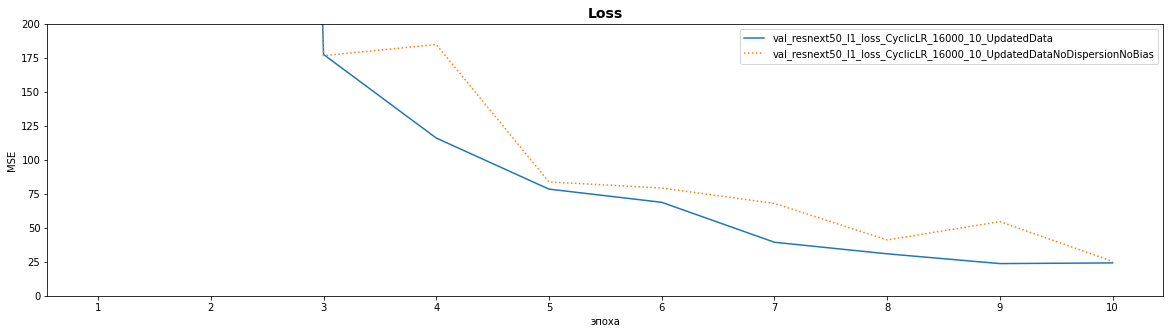

In [356]:
# figure
plt.figure(figsize=(20, 5)) 
ax = plt.axes() # Add an axes to the current figure and make it the current axes

for experiment in [
#     'resnext50_wing_loss_w4_e2_CyclicLR_16000_10_UpdatedData',
#     'resnext50_wing_loss_w4_e3_CyclicLR_16000_10_UpdatedData',
#     'resnext50_wing_loss_w6_e2_CyclicLR_16000_10_UpdatedData',
#     'resnext50_wing_loss_w4_e3_CyclicLR_16000_10_UpdatedData',
    'resnext50_l1_loss_CyclicLR_16000_10_UpdatedData', 
    'resnext50_l1_loss_CyclicLR_16000_10_UpdatedDataNoDispersionNoBias' 
]:
    

    with open(f'runs/{experiment}/metrics_{experiment}.txt') as f:
        metrics = json.load(f)

    # data
    x = range(1, len(metrics['val_loss']) + 1)
    ls = 'solid' if experiment=='resnext50_l1_loss_CyclicLR_16000_10_UpdatedData' else 'dotted'
    ax.plot(x, metrics['val_loss'], linestyle=ls, label=f'val_{experiment}')

# annotation    
ax.set_title('Loss', fontsize=14, fontweight='bold')
ax.set_xlabel('эпоха')
ax.set_ylabel('MSE')
ax.legend()
ax.set_xticks(range(1, len(metrics['train_loss']) + 1))
ax.set_ylim([0, 200])

In [429]:
import timm
from pprint import pprint
model_names = timm.list_models(pretrained=True)
pprint(model_names)

['adv_inception_v3',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'cspdarknet53',
 'cspresnet50',
 'cspresnext50',
 'deit_base_distilled_patch16_224',
 'deit_base_distilled_patch16_384',
 'deit_base_patch16_224',
 'deit_base_patch16_384',
 'deit_small_distilled_patch16_224',
 'deit_small_patch16_224',
 'deit_tiny_distilled_patch16_224',
 'deit_tiny_patch16_224',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenetblur121d',
 'dla34',
 'dla46_c',
 'dla46x_c',
 'dla60',
 'dla60_res2net',
 'dla60_res2next',
 'dla60x',
 'dla60x_c',
 'dla102',
 'dla102x',
 'dla102x2',
 'dla169',
 'dm_nfnet_f0',
 'dm_nfnet_f1',
 'dm_nfnet_f2',
 'dm_nfnet_f3',
 'dm_nfnet_f4',
 'dm_nfnet_f5',
 'dm_nfnet_f6',
 'dpn68',
 'dpn

In [ ]:
dm_nfnet_f6

In [526]:
import timm
model = timm.create_model('efficientnetv2_rw_s', pretrained=True)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_v2s_ra2_288-a6477665.pth" to /tmp/xdg_cache/torch/hub/checkpoints/efficientnet_v2s_ra2_288-a6477665.pth


In [442]:
model._modules

OrderedDict([('conv_stem',
              Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)),
             ('bn1',
              BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)),
             ('act1', SwishMe()),
             ('blocks',
              Sequential(
                (0): Sequential(
                  (0): EdgeResidual(
                    (conv_exp): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                    (bn1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    (act1): SwishMe()
                    (se): Identity()
                    (conv_pwl): Conv2d(24, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
                    (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  )
                  (1): EdgeResidual(
                    (conv_exp): Conv2d(24, 24, kernel_size=

In [443]:
model._modules['classifier']

Linear(in_features=1792, out_features=1000, bias=True)